<h1>Capstone Project - The Battle of Neighborhoods (Week 2)</h1>

<h3>Applied Data Science Capstone by IBM/Coursera</h3>

## Table of contents
* [1. Introduction: Business Problem](#introduction)
* [2. Data](#data)
* [3. Methodology](#methodology)
* [4. Analysis](#analysis)
* [5. Results and Discussion](#results)
* [6. Conclusion](#conclusion)
* [7. References](#references)

## 1. INTRODUCTION: BUSINESS PROBLEM <a name="introduction"></a>

According to the World Health Organization (WHO), between 1975 and 2016 obesity has tripled worldwide. In 2016, more than 1900 million adults 18 and over were overweight, of which more than 650 million were obese. [1](#1)

In Mexico, <strong>overweight and obesity affect 70% of Mexicans</strong>, which translates into a serious <strong>public health problem</strong>. WHO recommends that adults <strong>do at least 150 minutes of moderate-vigorous physical activity per week</strong>. From 2012 to 2016, the proportion of adults who did not comply with this recommendation in Mexico decreased slightly from 16% to 14.4%, being higher in men (15.2% vs. 13.7%) than in women (16.7% vs. 15.0%).[2](#2)

This problem is one of the main aspects that motivate the analysis of this market and this translates into an <strong>extraordinary business opportunity</strong>. Accordingly, we will develop a project to <strong>find prosperous and optimal boroughs to establish gyms in Mexico City</strong>. This analysis will deepen into one of them, choosen for its optimal characteristics, we will <strong>explore its neighborhoods and find the most common places</strong> to later group them according to their behavior patterns.

The study is targeted at <strong>gym entrepreneurs and future entrepreneurs</strong> who are considering venturing into this sector. The findings will allow to stakeholders to have more information that results in <strong>better business decisions</strong>.

## 2. DATA <a name="data"></a>

To achieve the objective of the project, the following information is required:
- Indicator that measures the prosperity of places [3](#1)
- Boroughs data [4](#2)
- Neighborhoods data [5](#3)
- Population and land area data [6](#4)
- Projections of population growth [7](#5)
- Number and location of existing gyms in Mexico City [8](#6)
- Information of the most common places [9](#7)

The population and gym data available in Mexico City will allow us to have a clear picture of current state of this market. The data will be divided by borough and we will get the information of the neighborhoods that integrate each of them. We will choose a <strong>borough that we can consider optimal to develop the project</strong>. To choose the borough where we will deepen the analysis, we will also consider the most appropriate information we find about the <strong>prosperity of the boroughts</strong> and we will use <strong>k-means clustering algorithm to discover insights and try to choose the best choice</strong>.

Finally, we will deepen the analysis of the chosen borough and <strong>explore the most common venues in each of the neighborhoods</strong> through the Foursquare API and the information obtained will be treated by <strong>k-means clustering algorithm to group the neighborhoods into clusters</strong> and be able to <strong>identify patterns of each cluster</strong>.

## 3. METHODOLOGY <a name="methodology"></a>

This project will determine which are <strong>the most suitable boroughs to establish gyms in Mexico</strong>. For the purposes of this analysis, it will consider the <strong>population and territorial characteristics, the prosperity indices and the amount of existing gyms</strong>.

<strong>Three groups will be created and each of the 16 boroughs will be part of one of them</strong>. We will choose <strong>the most appropriate group</strong> for our project and then we will explore one of the boroughs of the group chosen to deepen the analysis at neighborhood level. We will choose a borough that fits our needs and promises to be a success for our project. 

To perform the exploration we will use the <strong>location of each of the neighborhoods as a starting point</strong>. We will consider as limit the <strong>first 100 places provided by Foursquare API in a radius of 500 meters</strong>. We will obtain the <strong>10 most common venues per neighborhood</strong> and then separate them into <strong>8 groups according to their behavior patterns</strong>.

## 4. ANALYSIS <a name="analysis"></a>

In [1]:
import pandas as pd # library to process data as dataframes

!pip install geopandas
import geopandas as gpd # library for geospatial visualizations

# conda install -c conda-forge geopandas (via the command line)
# conda install -c conda-forge/label/dev geopandas (via the command line)
# conda install -c conda-forge/label/gcc7 geopandas (via the command line)
# conda install -c conda-forge/label/broken geopandas (via the command line)
# conda install -c conda-forge/label/rc geopandas (via the command line)
# conda install -c conda-forge/label/cf201901 geopandas (via the command line)
import numpy as np # library for vectorized computation (via the command line)
import unicodedata
import matplotlib.pyplot as plt
# pip install geopandas matplotlib (via the command line)
%matplotlib inline

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # Python library that helps you create several types of Leaflet maps

from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

print('Folium installed and imported!')

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.5.15-0, anaconda::certifi-2019.6.16-py37_0, anaconda::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, anaconda::openssl-1.1.1c-he774522_1, defaults::certifi-2019.6.16-py37_0
  - anaconda::certifi-2019.6.16-py37_0, anaconda::openssl-1.1.1c-he774522_1, defaults::ca-certificates-2019.5.15-0
  - anaconda::openssl-1.1.1c-he774522_1, defaults::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0
  - anaconda::certifi-2019.6.16-py37_0, defaults::ca-certificates-2019.5.15-0, defaults::openssl-1.1.1c-he774522_1
  - defaults::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, anaconda::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1done

# All requested packages already instal

In [3]:
from sklearn.cluster import KMeans # import k-means from clustering stage
import random # library for random number generation

After import and install packages, let´s <strong>read "alcaldias.geojson"</strong> file and <strong>create a dataframe called boroughscdmx</strong>.

In [4]:
boroughscdmx = gpd.read_file('alcaldias.geojson')
boroughscdmx.columns = ['geo_key', 'borough', 'borough_key', 'state_key', 'geometry']

boroughscdmx['borough'] = boroughscdmx['borough'].str.upper()

#alcaldiascdmx['borough'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
boroughscdmx['borough'] = boroughscdmx['borough'].str.replace(u'Á','A')
boroughscdmx['borough'] = boroughscdmx['borough'].str.replace(u'É','E')
boroughscdmx['borough'] = boroughscdmx['borough'].str.replace(u'Í','I')
boroughscdmx['borough'] = boroughscdmx['borough'].str.replace(u'Ó','O')
boroughscdmx['borough'] = boroughscdmx['borough'].str.replace(u'Ú','U')

boroughscdmx.set_index('borough', inplace=True)
boroughscdmx.head()

,geo_key,borough_key,state_key,geometry
borough,,,,
TLALPAN,09012,012,09,POLYGON ((-99.19628607999992 19.30227816999913...
VENUSTIANO CARRANZA,09017,017,09,POLYGON ((-99.10894588999996 19.45273362999915...
AZCAPOTZALCO,09002,002,09,POLYGON ((-99.18230696999991 19.50747924999914...
IZTAPALAPA,09007,007,09,POLYGON ((-99.05813287699995 19.40071958499914...
IZTACALCO,09006,006,09,POLYGON ((-99.05583625999996 19.42196122999907...


The following data frame will be constructed considering the most accurate population information of the year 2015 and projections from 2016 to 2030.

In [5]:
populationcdmx_2015_2030 = pd.read_csv('poblacioncdmx_2015_2030.csv', encoding='utf-8')
populationcdmx_2015_2030.head()

,borough,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,AZCAPOTZALCO,400,415,413,412,410,408,407,406,406,405,405,406,407,408,409,411
1,COYOACAN,608,630,628,626,624,622,620,619,618,618,618,618,619,620,622,625
2,CUAJIMALPA DE MORELOS,199,196,198,199,199,199,199,199,199,198,197,195,193,191,188,185
3,GUSTAVO A. MADERO,1164,1194,1189,1185,1181,1177,1174,1171,1168,1166,1164,1163,1162,1162,1163,1164
4,IZTACALCO,390,397,396,395,394,394,393,393,392,392,392,392,392,392,392,392


In [6]:
populationcdmx_2015_2030 = populationcdmx_2015_2030.drop(['borough'], axis=1)

In [7]:
populationcdmx_2015_2030_sum = populationcdmx_2015_2030.sum(axis=0)

In [8]:
populationcdmx_2015_2030_sum = populationcdmx_2015_2030_sum.reset_index()
populationcdmx_2015_2030_sum.rename(columns={'index': 'year', 0: 'population'}, inplace=True)

Let's graph the <strong>population behavior of Mexico City over time</strong>.

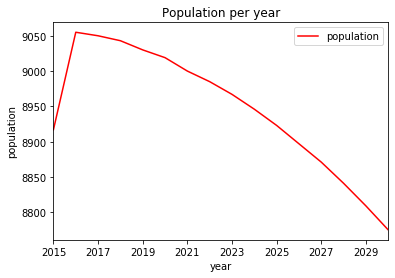

In [9]:
ax = plt.gca()

populationcdmx_2015_2030_sum.plot(kind='line',x='year',y='population', color='red', ax=ax)

plt.ylabel('population')
plt.title('Population per year')

plt.show()

Now, we will <strong>create a dataframe</strong> that we will use to <strong>merge it with the "boroughscdmx" dataframe</strong> and finally <strong>generate a choropleth map</strong>.

In [10]:
populationcdmx = pd.read_csv('poblacioncdmx.csv', encoding='utf-8')
populationcdmx = populationcdmx.drop(['borough_key', 'pp_2016', 'ppth_2016', 'pp_2017', 'ppth_2017',
                                   'pp_2018', 'ppth_2018', 'pp_2020', 'ppth_2020', 'pp_2021', 'ppth_2021', 
                                   'pp_2022', 'ppth_2022', 'pp_2023', 'ppth_2023','pp_2024', 'ppth_2024', 
                                   'pp_2025', 'ppth_2025', 'pp_2026', 'ppth_2026', 'pp_2027', 'ppth_2027', 
                                   'pp_2028', 'ppth_2028', 'pp_2029', 'ppth_2029', 'pp_2030', 'ppth_2030'], axis=1)
populationcdmx.set_index('borough', inplace=True)
populationcdmx.head()

,population2015,population2015_th,population_per1,population_per2,land_area,land_area1,population_per_square_kilometer,population_per_square_kilometer1,pp_2019,ppth_2019
borough,,,,,,,,,,
AZCAPOTZALCO,"400,161",400.0,4.5,4.50%,2.20%,2.2,"11,937",11937.0,"409,860",410.0
COYOACAN,"608,479",608.0,6.8,6.80%,3.60%,3.6,"11,284",11284.0,"623,683",624.0
CUAJIMALPA DE MORELOS,"199,224",199.0,2.2,2.20%,4.80%,4.8,"2,788",2788.0,"199,380",199.0
GUSTAVO A. MADERO,"1,164,477",1164.0,13.1,13.10%,5.90%,5.9,"13,247",13247.0,"1,180,729",1181.0
IZTACALCO,"390,348",390.0,4.4,4.40%,1.50%,1.5,"16,902",16902.0,"394,448",394.0


In [11]:
# Merge both files and reset index.
mergedcdmx = pd.merge(boroughscdmx, populationcdmx, on = 'borough')
mergedcdmx = mergedcdmx.reset_index()
mergedcdmx.head()

,borough,geo_key,borough_key,state_key,geometry,population2015,population2015_th,population_per1,population_per2,land_area,land_area1,population_per_square_kilometer,population_per_square_kilometer1,pp_2019,ppth_2019
0,TLALPAN,09012,012,09,POLYGON ((-99.19628607999992 19.30227816999913...,"677,104",677.0,7.6,7.60%,21.00%,21.0,"2,153",2153.0,"681,728",682.0
1,VENUSTIANO CARRANZA,09017,017,09,POLYGON ((-99.10894588999996 19.45273362999915...,"427,263",427.0,4.8,4.80%,2.30%,2.3,"12,617",12617.0,"434,290",434.0
2,AZCAPOTZALCO,09002,002,09,POLYGON ((-99.18230696999991 19.50747924999914...,"400,161",400.0,4.5,4.50%,2.20%,2.2,"11,937",11937.0,"409,860",410.0
3,IZTAPALAPA,09007,007,09,POLYGON ((-99.05813287699995 19.40071958499914...,"1,827,868",1828.0,20.5,20.50%,7.60%,7.6,"16,152",16152.0,"1,823,468",1823.0
4,IZTACALCO,09006,006,09,POLYGON ((-99.05583625999996 19.42196122999907...,"390,348",390.0,4.4,4.40%,1.50%,1.5,"16,902",16902.0,"394,448",394.0


Adding <strong>prosperity index</strong> into a column.

In [12]:
# Declare a list that is to be converted into a column 
prosperity_index = ['54.3', '53.7', '56.5', '53.2', '54.4', '61.5', '53.4', '57.1', '49.7', '55.7', '56.6', 
'52.2', '52.1', '57.4', '55.2', '54.1'] 

# Using 'prosperity_index' as the column name 
# and equating it to the list 
mergedcdmx['prosperity_index'] = prosperity_index
mergedcdmx.head()

,borough,geo_key,borough_key,state_key,geometry,population2015,population2015_th,population_per1,population_per2,land_area,land_area1,population_per_square_kilometer,population_per_square_kilometer1,pp_2019,ppth_2019,prosperity_index
0,TLALPAN,09012,012,09,POLYGON ((-99.19628607999992 19.30227816999913...,"677,104",677.0,7.6,7.60%,21.00%,21.0,"2,153",2153.0,"681,728",682.0,54.3
1,VENUSTIANO CARRANZA,09017,017,09,POLYGON ((-99.10894588999996 19.45273362999915...,"427,263",427.0,4.8,4.80%,2.30%,2.3,"12,617",12617.0,"434,290",434.0,53.7
2,AZCAPOTZALCO,09002,002,09,POLYGON ((-99.18230696999991 19.50747924999914...,"400,161",400.0,4.5,4.50%,2.20%,2.2,"11,937",11937.0,"409,860",410.0,56.5
3,IZTAPALAPA,09007,007,09,POLYGON ((-99.05813287699995 19.40071958499914...,"1,827,868",1828.0,20.5,20.50%,7.60%,7.6,"16,152",16152.0,"1,823,468",1823.0,53.2
4,IZTACALCO,09006,006,09,POLYGON ((-99.05583625999996 19.42196122999907...,"390,348",390.0,4.4,4.40%,1.50%,1.5,"16,902",16902.0,"394,448",394.0,54.4


We <strong>import the package called JSON</strong> used for encoding and decoding JSON data.

In [13]:
import json

#Read data to json.
merged_json = json.loads(mergedcdmx.to_json())

#Convert to String like object.
json_data = json.dumps(merged_json)

In [14]:
mergedcdmx.describe()

,population2015_th,population_per1,land_area1,population_per_square_kilometer1,ppth_2019
count,16.000000,16.000000,16.000000,16.000000,16.00000
mean,557.312500,6.256250,6.243750,9183.125000,564.37500
std,418.298254,4.697513,5.914611,5748.073438,417.73626
min,138.000000,1.500000,1.500000,463.000000,139.00000
25%,363.500000,4.100000,2.275000,3795.750000,376.00000
50%,416.500000,4.700000,4.500000,9570.000000,424.50000
75%,625.250000,7.000000,6.700000,13843.500000,638.50000
max,1828.000000,20.500000,21.000000,16902.000000,1823.00000


In [15]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer


from bokeh.models import HoverTool


#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlOrRd'][8]

#Reverse color order so that dark red is most populated.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 1600)

#Define custom tick labels for color bar.
tick_labels = {'0': '0', '200': '200 K', '400':'400 K', '600':'600 K', '800':'800 K', '1000':'1 M', '1200':'1.2 M','1400':'1.4 M', '1600':'>1.6 M'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 20, height = 500,
border_line_color=None,location = (0,0), orientation = 'vertical', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Population in Mexico City (CDMX), 2015', plot_height = 550 , plot_width = 500, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'population2015_th', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)



hover = HoverTool()
hover.tooltips = [('Borough', '@borough'), ('Prosperity Index', '@prosperity_index'), ('Population', '@population2015'), ('Population projection 2019', '@pp_2019'),
                 ('% land area', '@land_area')]

p.add_tools(hover)



#Specify figure layout.
p.add_layout(color_bar, 'right')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

Let´s <strong>import "empresascdmx.csv" file and create a dataframe called "companiescdmx"</strong>. This file contains relevant information about existent enterprises inside of Mexico City. Subsequently, let's <strong>filter only the companies dedicated to physical conditioning</strong>.

In [16]:
companiescdmx = pd.read_csv('empresascdmx.csv', dtype={'postal_code' : object}, encoding='utf-8')

# Work with only activity names rows that contain the word ACONDICIONAMIENTO FISICO
gymcdmx = companiescdmx[companiescdmx['activity_name'].str.contains('ACONDICIONAMIENTO FISICO')].reset_index(drop=True)

gymcdmx.head()

,id,property_name,borough,postal_code,latitude,longitude,activity_name,per_ocu
0,689998,NOMBRE,MIGUEL HIDALGO,11550,19.432421,-99.197516,CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR...,11 A 30 PERSONAS
1,752673,4LMENTS,GUSTAVO A MADERO,7080,19.497102,-99.099472,CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR...,6 A 10 PERSONAS
2,867230,4U GYM,CUAUHTEMOC,6170,19.411054,-99.181762,CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR...,6 A 10 PERSONAS
3,6785444,8W BARRANCA DEL MUERTO,BENITO JUAREZ,3910,19.363018,-99.182585,CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR...,6 A 10 PERSONAS
4,6734479,8W CONDESA,CUAUHTEMOC,6100,19.405872,-99.170853,CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR...,6 A 10 PERSONAS


Let's see <strong>how many gyms are there in Mexico City</strong>.

In [17]:
gymcdmx.activity_name.value_counts()

CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR PRIVADO    1950
CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR PUBLICO     175
Name: activity_name, dtype: int64

There are 1950 private sector gyms and 175 public sector gyms. Now, let´s see <strong>how many gyms are there by borough</strong>.

In [18]:
gymbyborough = gymcdmx['borough'].value_counts()
gymbyborough

IZTAPALAPA                380
GUSTAVO A MADERO          283
TLALPAN                   164
CUAUHTEMOC                153
COYOACAN                  152
TLAHUAC                   130
XOCHIMILCO                127
BENITO JUAREZ             116
ALVARO OBREGON            110
MIGUEL HIDALGO            104
VENUSTIANO CARRANZA       101
IZTACALCO                  84
AZCAPOTZALCO               71
LA MAGDALENA CONTRERAS     58
CUAJIMALPA DE MORELOS      49
MILPA ALTA                 43
Name: borough, dtype: int64

Now, it´s time to <strong>map a sample of existing gyms</strong> inside of Mexico City (1,800 gyms). This will be done using clusters for better viewing and each cluster is then represented by the number of gyms in that area.

In [19]:
# Mexico City latitude and longitude values
latitude = 19.3884706
longitude = -99.1276627

In [20]:
# get the first 1800 gyms in the gymcmdx dataframe
limit = 1800
gymcdmx_sample = gymcdmx.iloc[0:limit, :]

In [21]:
from folium import plugins

# Create map and display it
cdmx_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

# instantiate a mark cluster object for the gyms in the dataframe
gym = plugins.MarkerCluster().add_to(cdmx_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(gymcdmx_sample.latitude, gymcdmx_sample.longitude, gymcdmx_sample.property_name):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(gym)

# display map
cdmx_map

For the purposes of <strong>using K-means and segmenting boroughs according to their behavior patterns</strong>, we will only use some columns of "mergedcdmx", not omitting that to refine the results more variables could be used.

In [22]:
boroughsmatrix = mergedcdmx[['population2015_th', 'population_per1', 'population_per_square_kilometer1', 
                              'land_area1', 'prosperity_index']].copy()
boroughsmatrix.head()

,population2015_th,population_per1,population_per_square_kilometer1,land_area1,prosperity_index
0,677.0,7.6,2153.0,21.0,54.3
1,427.0,4.8,12617.0,2.3,53.7
2,400.0,4.5,11937.0,2.2,56.5
3,1828.0,20.5,16152.0,7.6,53.2
4,390.0,4.4,16902.0,1.5,54.4


In [23]:
boroughsmatrix.dtypes

population2015_th                   float64
population_per1                     float64
population_per_square_kilometer1    float64
land_area1                          float64
prosperity_index                     object
dtype: object

In [24]:
boroughsmatrix['prosperity_index']=boroughsmatrix['prosperity_index'].astype('float')

Now, let's <strong>normalize the dataset</strong> using StandardScaler to help mathematical-based algorithms interpret features with different magnitudes and distributions equally.

In [25]:
from sklearn.preprocessing import StandardScaler

X = boroughsmatrix.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.295437  , -1.26315051,  2.57670185, -0.19719526],
       [-0.32017126,  0.61698774, -0.6886484 , -0.42527654],
       [-0.38612929,  0.4948075 , -0.70611016,  0.63910273],
       [ 3.13163218,  1.2521453 ,  0.2368252 , -0.61534426],
       [-0.40811529,  1.38690292, -0.82834253, -0.15918172],
       [-0.47407332, -0.2384536 , -0.54895427,  2.53977998],
       [-0.78187745, -0.95895765, -0.35687484, -0.53931717],
       [ 0.11954892,  0.37747854, -0.46164544,  0.867184  ],
       [-1.04570956, -1.56680433,  2.40208419, -1.94581834],
       [-0.05633915,  1.29203356, -0.70611016,  0.33499437],
       [ 0.47132507, -0.24474229,  0.02728401,  0.67711627],
       [-0.34215727, -0.99507269,  0.2368252 , -0.99547971],
       [-0.47407332, -0.89319593, -0.09494835, -1.03349326],
       [-0.34215727,  1.15889303, -0.77595723,  0.98122463],
       [-0.8918075 , -1.14905573, -0.25210425,  0.14492664],
       [ 1.5046675 ,  0.73018414, -0.06002482, -0.27322235]])

In [26]:
np.random.seed(0)

After normalization, let´s <strong>run the model and group the boroughs into three clusters</strong>.

In [27]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 1 1 2 1 1 0 1 0 1 1 0 0 1 0 2]


Each row in the dataset represent a borough and <strong>a label will be assigned to each one of them</strong>.

In [28]:
boroughsmatrix["Labels"] = labels
boroughsmatrix

,population2015_th,population_per1,population_per_square_kilometer1,land_area1,prosperity_index,Labels
0,677.0,7.6,2153.0,21.0,54.3,0
1,427.0,4.8,12617.0,2.3,53.7,1
2,400.0,4.5,11937.0,2.2,56.5,1
3,1828.0,20.5,16152.0,7.6,53.2,2
4,390.0,4.4,16902.0,1.5,54.4,1
5,364.0,4.1,7856.0,3.1,61.5,1
6,244.0,2.7,3846.0,4.2,53.4,0
7,608.0,6.8,11284.0,3.6,57.1,1
8,138.0,1.5,463.0,20.0,49.7,0
9,533.0,6.0,16374.0,2.2,55.7,1


We will get the <strong>centroid value</strong> by averaging the features in each cluster.

In [29]:
boroughsmatrix.groupby('Labels').mean()

,population2015_th,population_per1,population_per_square_kilometer1,land_area1,prosperity_index
Labels,,,,,
0,339.333333,3.8000,2851.166667,10.5500,52.816667
1,486.125000,5.4625,12553.000000,2.8875,56.612500
2,1496.000000,16.8000,14699.500000,6.7500,53.650000


Considering the common characteristics of each cluster, let´s create a profile for each of them.

<h3>Label 0</h3>
<p style="color:blue;">Population: <strong>Low</strong></p>
<p style="color:blue;">Percentage of population: <strong>Low</strong></p>
<p style="color:blue;">Population per square kilometer: <strong>Low</strong></p>
<p style="color:red;">Large area of land: <strong>High</strong></p>
<p style="color:blue;">Prosperity Index: <strong>Low</strong></p>

<h3>Label 1</h3>
<p style="color:orange;">Population: <strong>Middle</strong></p>
<p style="color:orange;">Percentage of population: <strong>Middle</strong></p>
<p style="color:orange;">Population per square kilometer: <strong>Middle</strong></p>
<p style="color:blue;">Large area of land: <strong>Low</strong></p>
<p style="color:red;">Prosperity Index: <strong>High</strong></p>

<h3>Label 2</h3>
<p style="color:red;">Population: <strong>High</strong></p>
<p style="color:red;">Percentage of population: <strong>High</strong></p>
<p style="color:red;">Population per square kilometer: <strong>High</strong></p>
<p style="color:orange;">Large area of land: <strong>Middle</strong></p>
<p style="color:orange;">Prosperity Index: <strong>Middle</strong></p>

<strong>WE CHOOSE THE "LABEL 1" GROUP MAINLY BECAUSE IT HAS THE HIGHEST PROSPERITY INDEX AND ITS POPULATION FEATURES ARE ACCEPTABLE TO DEVELOP THE PROJECT.</strong>

<strong>WITHIN "LABEL 1", WE IDENTIFY MIGUEL HIDALGO AS THE BOROUGH WITH THE HIGHEST PROSPERITY INDEX AND IT IS THE SEVENTH BOROUGH WITH THE LEAST AMOUNT OF EXISTING GYMS.</strong>

<strong>LET´S EXPLORE MIGUEL HIDALGO!</strong>

Read "coloniascdmx.csv" file and <strong>create a dataframe that contain neighborhoods information</strong> of Miguel Hidalgo borough.

In [30]:
neighborhoodscdmx = pd.read_csv('coloniascdmx.csv', encoding='utf-8')
neighborhoodscdmx.head()

,BOROUGH,NEIGHBORHOOD,LATITUDE,LONGITUDE
0,MIGUEL HIDALGO,LOMAS DE REFORMA,19.40168155,-99.23547196
1,MIGUEL HIDALGO,DANIEL GARZA (AMPL),19.40921847,-99.19383925
2,MIGUEL HIDALGO,IGNACIO MANUEL ALTAMIRANO,19.46314405,-99.196828
3,MIGUEL HIDALGO,LEGARIA,19.45553055,-99.19304827
4,MIGUEL HIDALGO,LEGARIA (U HAB),19.45002004,-99.20107608


In [31]:
# Borough column filter
neighborhoods_mh = neighborhoodscdmx[neighborhoodscdmx['BOROUGH'] == 'MIGUEL HIDALGO'].reset_index(drop=True)
neighborhoods_mh.head()

,BOROUGH,NEIGHBORHOOD,LATITUDE,LONGITUDE
0,MIGUEL HIDALGO,LOMAS DE REFORMA,19.40168155,-99.23547196
1,MIGUEL HIDALGO,DANIEL GARZA (AMPL),19.40921847,-99.19383925
2,MIGUEL HIDALGO,IGNACIO MANUEL ALTAMIRANO,19.46314405,-99.196828
3,MIGUEL HIDALGO,LEGARIA,19.45553055,-99.19304827
4,MIGUEL HIDALGO,LEGARIA (U HAB),19.45002004,-99.20107608


In [32]:
neighborhoods_mh.shape

(88, 4)

There are <strong>88 neighborhoods</strong> in the Miguel Hidalgo borough.

In [33]:
neighborhoods_mh.dtypes

BOROUGH         object
NEIGHBORHOOD    object
LATITUDE        object
LONGITUDE       object
dtype: object

In [34]:
# Converting "LATITUDE" and "LONGITUDE" columns type to float.
neighborhoods_mh['LATITUDE']=neighborhoods_mh['LATITUDE'].astype('float')
neighborhoods_mh['LONGITUDE']=neighborhoods_mh['LONGITUDE'].astype('float')

In [35]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.5.15-0, anaconda::certifi-2019.6.16-py37_0, anaconda::openssl-1.1.1c-he774522_1
  - anaconda::certifi-2019.6.16-py37_0, anaconda::openssl-1.1.1c-he774522_1, defaults::ca-certificates-2019.5.15-0
  - anaconda::ca-certificates-2019.5.15-0, anaconda::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::certifi-2019.6.16-py37_0, defaults::ca-certificates-2019.5.15-0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1
  - defaults::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, anaconda::openssl-1.1.1c-he774522_1, defaults::certifi-2019.6.16-py37_0
  - anaconda::openssl-1.1.1c-he774522_1, defaults::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0done

# All requested packages already instal

Geopy library will be used to get the latitude and longitude values of Miguel Hidalgo.

In [36]:
address = 'Miguel Hidalgo, Ciudad de México'

geolocator = Nominatim(user_agent="Miguel_Hidalgo")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Miguel Hidalgo borough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Miguel Hidalgo borough are 19.42966465, -99.1986750379349.


In [37]:
# create map of Miguel Hidalgo borough using latitude and longitude values
map_mh = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_mh['LATITUDE'], neighborhoods_mh['LONGITUDE'], 
                                           neighborhoods_mh['BOROUGH'], neighborhoods_mh['NEIGHBORHOOD']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh)  
    
map_mh

<strong>Define Foursquare Credentials and Version</strong>

In [38]:
# Let´s install Hide_code
# hide_code is a Jupyter notebook extension to selectively hide code, prompts and outputs with PDF and HTML exporting support.

#INSTALLATION
# pip install hide_code
# jupyter nbextension install --py hide_code
# jupyter nbextension enable --py hide_code
# jupyter serverextension enable --py hide_code

# UPGRADING WITH NBEXTENSION
# pip install hide_code --upgrade
# jupyter nbextension install --py hide_code

CLIENT_ID = '4CJMUA53TYSEN5HNMMC3VEKH0DLXEYUEEHJES5TZ4EIYWQFZ' # your Foursquare ID
CLIENT_SECRET = 'LHPY05VRBWJQ040U0HA5AYJWGND3H3UIQN2U2LWMNEH5RLQD' # your Foursquare Secret
VERSION = '20191003' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4CJMUA53TYSEN5HNMMC3VEKH0DLXEYUEEHJES5TZ4EIYWQFZ
CLIENT_SECRET:LHPY05VRBWJQ040U0HA5AYJWGND3H3UIQN2U2LWMNEH5RLQD


<h3>Explore Neighborhoods in Miguel Hidalgo, Ciudad de México</h3>

In [39]:
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [40]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
miguelhidalgocdmx_venues = getNearbyVenues(names=neighborhoods_mh['NEIGHBORHOOD'], # neighborhood name
                                   latitudes=neighborhoods_mh['LATITUDE'], # neighborhood latitude value
                                   longitudes=neighborhoods_mh['LONGITUDE'] # neighborhood longitude value
                                  )

LOMAS DE REFORMA
DANIEL GARZA (AMPL)
IGNACIO MANUEL ALTAMIRANO
LEGARIA
LEGARIA (U HAB)
TORRE BLANCA
UN HOGAR PARA NOSOTROS
PENSIL SUR
ANAHUAC PERALITOS
AGRICULTURA
ANAHUAC DOS LAGOS
MODELO PENSIL
POPO
REFORMA PENSIL
VENTURA PEREZ DE ALBA
16 DE SEPTIEMBRE
POLANCO REFORMA (POLANCO)
MOLINO DEL REY
BOSQUES DE LAS LOMAS
ESCANDON I
ESCANDON II
POPOTLA I
SAN MIGUEL CHAPULTEPEC I
BOSQUES DE CHAPULTEPEC (POLANCO)
LOMAS DE BEZARES
REFORMA SOCIAL
LOMAS DE SOTELO
SAN LORENZO TLALTENANGO
PALMITAS (POLANCO)
10 DE ABRIL
SAN MIGUEL CHAPULTEPEC II
ANAHUAC II
LOMAS DE CHAPULTEPEC
LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC)
DEL BOSQUE (POLANCO)
5 DE MAYO
PLUTARCO ELIAS CALLES
CHAPULTEPEC MORALES (POLANCO)
ANZURES
CUAUHTEMOC PENSIL
GRANADA (AMPL)
LOMAS VIRREYES (LOMAS DE CHAPULTEPEC)
PERIODISTA
SAN JOAQUIN
VERONICA ANZURES
SANTO TOMAS
TATA LZARO
ANAHUAC MARIANO ESCOBEDO
ANAHUAC LAGO NORTE
ANAHUAC LAGO SUR
LOMAS ALTAS
DEPORTIVA PENSIL
TORRES TOREO
AMERICA
FRANCISCO I MADERO
LOMAS DE BARRILACO (LOMAS DE CHAPULT

<strong>Let's check the size of the resulting dataframe</strong>

In [42]:
print(miguelhidalgocdmx_venues.shape)
miguelhidalgocdmx_venues.head()

(3269, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,LOMAS DE REFORMA,19.401682,-99.235472,Flores Del Bosque,19.400662,-99.233178,Flower Shop
1,LOMAS DE REFORMA,19.401682,-99.235472,K-vitacion,19.402467,-99.232648,Spa
2,LOMAS DE REFORMA,19.401682,-99.235472,Nine West,19.403501,-99.238881,Shoe Store
3,LOMAS DE REFORMA,19.401682,-99.235472,Plaza de la Radio,19.405568,-99.233329,Historic Site
4,DANIEL GARZA (AMPL),19.409218,-99.193839,Pozoleria Roger,19.409002,-99.195969,Mexican Restaurant


<strong>Let's check how many venues were returned for each neighborhood</strong>

In [43]:
miguelhidalgocdmx_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
10 DE ABRIL,8,8,8,8,8,8
16 DE SEPTIEMBRE,18,18,18,18,18,18
5 DE MAYO,24,24,24,24,24,24
AGRICULTURA,19,19,19,19,19,19
AHUEHUETES ANAHUAC,21,21,21,21,21,21
AMERICA,24,24,24,24,24,24
ANAHUAC DOS LAGOS,36,36,36,36,36,36
ANAHUAC I,20,20,20,20,20,20
ANAHUAC II,78,78,78,78,78,78


<strong>Unique categories</strong>

In [44]:
print('There are {} uniques categories.'.format(len(miguelhidalgocdmx_venues['Venue Category'].unique())))

There are 258 uniques categories.


<h3>Analizing each neighborhood</h3>

In [45]:
# one hot encoding
miguelhidalgo_onehot = pd.get_dummies(miguelhidalgocdmx_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
miguelhidalgo_onehot['Neighborhood'] = miguelhidalgocdmx_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [miguelhidalgo_onehot.columns[-1]] + list(miguelhidalgo_onehot.columns[:-1])
miguelhidalgo_onehot = miguelhidalgo_onehot[fixed_columns]

miguelhidalgo_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Veterinarian,Video Game Store,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,LOMAS DE REFORMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,LOMAS DE REFORMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LOMAS DE REFORMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LOMAS DE REFORMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DANIEL GARZA (AMPL),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<strong>Grouping rows by neighborhood and taking the mean of the frecuency of occurrence of each category</strong>

In [46]:
miguelhidalgo_grouped = miguelhidalgo_onehot.groupby('Neighborhood').mean().reset_index()
miguelhidalgo_grouped.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Veterinarian,Video Game Store,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,10 DE ABRIL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,16 DE SEPTIEMBRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,5 DE MAYO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0
3,AGRICULTURA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,AHUEHUETES ANAHUAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


<strong>Top 10 most common venues by neighborhood</strong>

In [47]:
top_venues = 10

for neigh in miguelhidalgo_grouped['Neighborhood']:
    print("----"+neigh+"----")
    temp = miguelhidalgo_grouped[miguelhidalgo_grouped['Neighborhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

----10 DE ABRIL----
                  venue  freq
0            Restaurant  0.25
1  Gym / Fitness Center  0.12
2    Mexican Restaurant  0.12
3            Playground  0.12
4    Athletics & Sports  0.12
5         Deli / Bodega  0.12
6           Coffee Shop  0.12
7          Optical Shop  0.00
8       Organic Grocery  0.00
9     Other Repair Shop  0.00


----16 DE SEPTIEMBRE----
                 venue  freq
0          Pizza Place  0.11
1   Mexican Restaurant  0.11
2          Coffee Shop  0.11
3   Seafood Restaurant  0.11
4               Bakery  0.11
5             Gym Pool  0.06
6  Sporting Goods Shop  0.06
7           Taco Place  0.06
8             Pharmacy  0.06
9                  Bar  0.06


----5 DE MAYO----
                   venue  freq
0     Mexican Restaurant  0.33
1             Food Court  0.08
2               Pharmacy  0.08
3         Sandwich Place  0.08
4  Street Food Gathering  0.04
5                 Bakery  0.04
6           Burger Joint  0.04
7            Snack Place  0.04
8    

                   venue  freq
0             Taco Place  0.24
1                 Museum  0.08
2           Burger Joint  0.05
3     Mexican Restaurant  0.05
4             Food Truck  0.05
5  Performing Arts Venue  0.03
6         Sandwich Place  0.03
7             Food Court  0.03
8                  Diner  0.03
9       Sushi Restaurant  0.03


----DEL BOSQUE (POLANCO)----
                  venue  freq
0    Mexican Restaurant  0.11
1                  Café  0.08
2           Coffee Shop  0.08
3    Spanish Restaurant  0.06
4         Deli / Bodega  0.06
5    Seafood Restaurant  0.04
6  Gym / Fitness Center  0.04
7            Restaurant  0.04
8            Taco Place  0.04
9           Snack Place  0.04


----DEPORTIVA PENSIL----
                           venue  freq
0                     Restaurant  0.29
1                  Deli / Bodega  0.14
2                    Coffee Shop  0.14
3           Gym / Fitness Center  0.14
4             Mexican Restaurant  0.14
5                     Playground  0.1

                      venue  freq
0        Mexican Restaurant  0.10
1               Coffee Shop  0.08
2             Deli / Bodega  0.08
3                    Bakery  0.06
4                      Café  0.06
5        Spanish Restaurant  0.04
6  Bike Rental / Bike Share  0.04
7                Restaurant  0.04
8               Snack Place  0.04
9             Movie Theater  0.02


----MANUEL AVILA CAMACHO----
                venue  freq
0  Mexican Restaurant  0.16
1                 Zoo  0.05
2      Boarding House  0.05
3       Indie Theater  0.05
4      Ice Cream Shop  0.05
5            Pharmacy  0.05
6         Fabric Shop  0.05
7               Plaza  0.05
8           Racetrack  0.05
9    Department Store  0.05


----MARINA NACIONAL (U HAB)----
                venue  freq
0          Taco Place  0.08
1   Convenience Store  0.08
2  Mexican Restaurant  0.06
3         Pizza Place  0.06
4          Restaurant  0.04
5                 Bar  0.04
6  Miscellaneous Shop  0.04
7         Coffee Shop  0.04
8

                venue  freq
0          Taco Place  0.15
1  Mexican Restaurant  0.15
2         Coffee Shop  0.08
3          Restaurant  0.08
4      Breakfast Spot  0.08
5        Cupcake Shop  0.08
6  Athletics & Sports  0.08
7   Food & Drink Shop  0.08
8              Bakery  0.08
9                Park  0.08


----REFORMA SOCIAL----
                    venue  freq
0              Restaurant  0.10
1  Furniture / Home Store  0.07
2      Mexican Restaurant  0.07
3               Nightclub  0.07
4              Taco Place  0.05
5              Steakhouse  0.02
6      Seafood Restaurant  0.02
7                  Bistro  0.02
8    Gym / Fitness Center  0.02
9               Bookstore  0.02


----RINCON DEL BOSQUE----
                  venue  freq
0           Coffee Shop  0.06
1  Gym / Fitness Center  0.06
2            Restaurant  0.05
3            Taco Place  0.04
4                  Café  0.04
5    Mexican Restaurant  0.04
6    Seafood Restaurant  0.03
7            Steakhouse  0.03
8          Liquor

<strong>Sorting the venues in descending order</strong>

In [48]:
def return_most_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

<strong>Create a dataframe of 10 venues for each neighborhood</strong>

In [49]:
top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = miguelhidalgo_grouped['Neighborhood']

for ind in np.arange(miguelhidalgo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(miguelhidalgo_grouped.iloc[ind, :], top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10 DE ABRIL,Restaurant,Athletics & Sports,Gym / Fitness Center,Deli / Bodega,Coffee Shop,Playground,Mexican Restaurant,Exhibit,Fabric Shop,Falafel Restaurant
1,16 DE SEPTIEMBRE,Seafood Restaurant,Pizza Place,Coffee Shop,Bakery,Mexican Restaurant,Taco Place,Sporting Goods Shop,Convenience Store,Gym Pool,Pharmacy
2,5 DE MAYO,Mexican Restaurant,Food Court,Pharmacy,Sandwich Place,Bakery,Restaurant,Snack Place,Burger Joint,Building,Street Food Gathering
3,AGRICULTURA,Bakery,Salad Place,Burger Joint,Mexican Restaurant,Deli / Bodega,Taco Place,Spanish Restaurant,Basketball Court,TV Station,Trade School
4,AHUEHUETES ANAHUAC,Burger Joint,Coffee Shop,Mexican Restaurant,Convenience Store,Gym,Burrito Place,Snack Place,Café,Taco Place,Seafood Restaurant


<h3>Cluster neighborhoods</h3>

In [50]:
# set number of clusters
kclusters = 8

miguelhidalgo_grouped_clustering = miguelhidalgo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(miguelhidalgo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 5, 0, 0, 2, 0, 7, 0, 2])

<strong>Create a dataframe of top 10 venues for each neighborhood and add a new column with the cluster information.</strong>

In [51]:
# Rename columns and set index
neighborhoods_mh.rename(columns={ 'BOROUGH': 'Borough', 'NEIGHBORHOOD': 'Neighborhood',
                                'LATITUDE': 'Latitude', 'LONGITUDE': 'Longitude'}, inplace=True)
neighborhoods_mh.set_index('Neighborhood')
neighborhoods_mh.head()

,Borough,Neighborhood,Latitude,Longitude
0,MIGUEL HIDALGO,LOMAS DE REFORMA,19.401682,-99.235472
1,MIGUEL HIDALGO,DANIEL GARZA (AMPL),19.409218,-99.193839
2,MIGUEL HIDALGO,IGNACIO MANUEL ALTAMIRANO,19.463144,-99.196828
3,MIGUEL HIDALGO,LEGARIA,19.455531,-99.193048
4,MIGUEL HIDALGO,LEGARIA (U HAB),19.450020,-99.201076


In [52]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

miguelhidalgo_merged = neighborhoods_mh

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
miguelhidalgo_merged = neighborhoods_mh.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

miguelhidalgo_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MIGUEL HIDALGO,LOMAS DE REFORMA,19.401682,-99.235472,3,Spa,Flower Shop,Historic Site,Shoe Store,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Food,Electronics Store,Farmers Market
1,MIGUEL HIDALGO,DANIEL GARZA (AMPL),19.409218,-99.193839,7,Taco Place,Museum,Food Truck,Burger Joint,Mexican Restaurant,Park,Diner,Restaurant,College Academic Building,Office
2,MIGUEL HIDALGO,IGNACIO MANUEL ALTAMIRANO,19.463144,-99.196828,7,Skate Park,Taco Place,Creperie,Mexican Restaurant,Department Store,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fish & Chips Shop
3,MIGUEL HIDALGO,LEGARIA,19.455531,-99.193048,2,Taco Place,Mexican Restaurant,Convenience Store,Bar,Food Truck,Motel,Grocery Store,Boutique,Farmers Market,Coffee Shop
4,MIGUEL HIDALGO,LEGARIA (U HAB),19.450020,-99.201076,5,Mexican Restaurant,Taco Place,Sandwich Place,Food Court,Restaurant,Gym,Theater,Pharmacy,Brewery,Market


<strong>Visualizing the resulting clusters</strong>

In [53]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters_mh = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miguelhidalgo_merged['Latitude'], miguelhidalgo_merged['Longitude'], 
                                  miguelhidalgo_merged['Neighborhood'], miguelhidalgo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_mh)
       
map_clusters_mh

<h3>Analizing clusters</h3>

Finally, we will examine the clusters and identify patterns 

<strong>Cluster 0</strong>

In [54]:
miguelhidalgo_merged.loc[miguelhidalgo_merged['Cluster Labels'] == 0, miguelhidalgo_merged.columns[[1] + list(range(5, miguelhidalgo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,AGRICULTURA,Bakery,Salad Place,Burger Joint,Mexican Restaurant,Deli / Bodega,Taco Place,Spanish Restaurant,Basketball Court,TV Station,Trade School
10,ANAHUAC DOS LAGOS,Mexican Restaurant,Convenience Store,Restaurant,Burger Joint,Pizza Place,Market,Fried Chicken Joint,Taco Place,Coffee Shop,Cocktail Bar
12,POPO,Mexican Restaurant,Seafood Restaurant,Sandwich Place,Restaurant,Residential Building (Apartment / Condo),Gourmet Shop,Burger Joint,Food Court,Steakhouse,Coffee Shop
16,POLANCO REFORMA (POLANCO),Mexican Restaurant,Coffee Shop,Seafood Restaurant,Restaurant,Italian Restaurant,Sporting Goods Shop,Steakhouse,Spa,Nightclub,Boutique
17,MOLINO DEL REY,Mexican Restaurant,Seafood Restaurant,Bakery,Restaurant,Sushi Restaurant,Coffee Shop,Taco Place,Park,Optical Shop,Snack Place
18,BOSQUES DE LAS LOMAS,Ice Cream Shop,Coffee Shop,Sushi Restaurant,Restaurant,Salad Place,Food Truck,Bakery,Food Court,Convenience Store,Gym
22,SAN MIGUEL CHAPULTEPEC I,Museum,Mexican Restaurant,Art Gallery,Taco Place,Diner,Restaurant,Gym,Coffee Shop,Bakery,Pizza Place
23,BOSQUES DE CHAPULTEPEC (POLANCO),Mexican Restaurant,Bakery,Restaurant,Coffee Shop,History Museum,Argentinian Restaurant,Bridal Shop,Seafood Restaurant,Museum,Steakhouse
24,LOMAS DE BEZARES,Convenience Store,Breakfast Spot,Snack Place,Cafeteria,Chinese Restaurant,Electronics Store,Coffee Shop,Gym,Restaurant,Food Court
25,REFORMA SOCIAL,Restaurant,Nightclub,Furniture / Home Store,Mexican Restaurant,Taco Place,Convenience Store,Food,French Restaurant,Bistro,Sushi Restaurant


<strong>Cluster 1</strong>

In [55]:
miguelhidalgo_merged.loc[miguelhidalgo_merged['Cluster Labels'] == 1, miguelhidalgo_merged.columns[[1] + list(range(5, miguelhidalgo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
82,NUEVA ARGENTINA (ARGENTINA PONIENTE),Convenience Store,Zoo,English Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant


<strong>Cluster 2</strong>

In [56]:
miguelhidalgo_merged.loc[miguelhidalgo_merged['Cluster Labels'] == 2, miguelhidalgo_merged.columns[[1] + list(range(5, miguelhidalgo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,LEGARIA,Taco Place,Mexican Restaurant,Convenience Store,Bar,Food Truck,Motel,Grocery Store,Boutique,Farmers Market,Coffee Shop
6,UN HOGAR PARA NOSOTROS,Mexican Restaurant,Taco Place,Historic Site,Coffee Shop,Salad Place,Restaurant,Breakfast Spot,Bakery,Sporting Goods Shop,Miscellaneous Shop
8,ANAHUAC PERALITOS,Taco Place,Mexican Restaurant,Coffee Shop,Pizza Place,Food Stand,Gym,Café,Bar,Bakery,Restaurant
11,MODELO PENSIL,Taco Place,Mexican Restaurant,Coffee Shop,Burger Joint,Restaurant,Food & Drink Shop,Skate Park,Café,Bar,Gym
13,REFORMA PENSIL,Taco Place,Mexican Restaurant,Coffee Shop,Convenience Store,Park,Bakery,Restaurant,Athletics & Sports,Food & Drink Shop,Breakfast Spot
14,VENTURA PEREZ DE ALBA,Taco Place,Theater,Gym,Mexican Restaurant,Residential Building (Apartment / Condo),Sandwich Place,Coffee Shop,Multiplex,Dog Run,Restaurant
15,16 DE SEPTIEMBRE,Seafood Restaurant,Pizza Place,Coffee Shop,Bakery,Mexican Restaurant,Taco Place,Sporting Goods Shop,Convenience Store,Gym Pool,Pharmacy
19,ESCANDON I,Taco Place,Mexican Restaurant,Burger Joint,Restaurant,Bar,Seafood Restaurant,Bakery,Coffee Shop,Movie Theater,Flea Market
20,ESCANDON II,Taco Place,Coffee Shop,Burger Joint,Mexican Restaurant,Seafood Restaurant,Bakery,Bar,Pharmacy,Breakfast Spot,Pizza Place
21,POPOTLA I,Convenience Store,Taco Place,Pharmacy,Bar,Breakfast Spot,Fried Chicken Joint,Electronics Store,Tennis Court,Sandwich Place,Coffee Shop


<strong>Cluster 3</strong>

In [57]:
miguelhidalgo_merged.loc[miguelhidalgo_merged['Cluster Labels'] == 3, miguelhidalgo_merged.columns[[1] + list(range(5, miguelhidalgo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,LOMAS DE REFORMA,Spa,Flower Shop,Historic Site,Shoe Store,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Food,Electronics Store,Farmers Market


<strong>Cluster 4</strong>

In [58]:
miguelhidalgo_merged.loc[miguelhidalgo_merged['Cluster Labels'] == 4, miguelhidalgo_merged.columns[[1] + list(range(5, miguelhidalgo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,LOMAS DE BARRILACO (LOMAS DE CHAPULTEPEC),Multiplex,Supermarket,Brewery,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop


<strong>Cluster 5</strong>

In [59]:
miguelhidalgo_merged.loc[miguelhidalgo_merged['Cluster Labels'] == 5, miguelhidalgo_merged.columns[[1] + list(range(5, miguelhidalgo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,LEGARIA (U HAB),Mexican Restaurant,Taco Place,Sandwich Place,Food Court,Restaurant,Gym,Theater,Pharmacy,Brewery,Market
7,PENSIL SUR,Mexican Restaurant,Taco Place,Convenience Store,German Restaurant,Park,Restaurant,Sandwich Place,Seafood Restaurant,Burger Joint,Snack Place
27,SAN LORENZO TLALTENANGO,Mexican Restaurant,Food Truck,Seafood Restaurant,Flea Market,Taco Place,Athletics & Sports,Farmers Market,Exhibit,Fabric Shop,Falafel Restaurant
33,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),Food Truck,Dog Run,Bakery,Gym / Fitness Center,Mexican Restaurant,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Event Space
35,5 DE MAYO,Mexican Restaurant,Food Court,Pharmacy,Sandwich Place,Bakery,Restaurant,Snack Place,Burger Joint,Building,Street Food Gathering
54,FRANCISCO I MADERO,Mexican Restaurant,Coffee Shop,Taco Place,Sandwich Place,Restaurant,Plaza,Residential Building (Apartment / Condo),Food Court,Miscellaneous Shop,Tapas Restaurant
66,MANUEL AVILA CAMACHO,Mexican Restaurant,Zoo,Taco Place,Ice Cream Shop,Indie Theater,Fabric Shop,Pharmacy,Department Store,Plaza,Convenience Store
67,POPO (AMPL),Mexican Restaurant,Residential Building (Apartment / Condo),Park,Taco Place,Snack Place,Gourmet Shop,Steakhouse,Restaurant,Coffee Shop,Gastropub
74,ANGEL ZIMBRON,Mexican Restaurant,Taco Place,Pizza Place,Convenience Store,Food Truck,Bakery,Dance Studio,Park,Other Repair Shop,Music Venue
84,MEXICO NUEVO,Mexican Restaurant,Taco Place,Park,Brewery,Pharmacy,Restaurant,Bakery,Playground,Seafood Restaurant,Theater


<strong>Cluster 6</strong>

In [60]:
miguelhidalgo_merged.loc[miguelhidalgo_merged['Cluster Labels'] == 6, miguelhidalgo_merged.columns[[1] + list(range(5, miguelhidalgo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79,SAN DIEGO OCOYOACAC,Park,Baseball Field,Skate Park,History Museum,Diner,Athletics & Sports,Farmers Market,Exhibit,Fabric Shop,Falafel Restaurant


<strong>Cluster 7</strong>

In [61]:
miguelhidalgo_merged.loc[miguelhidalgo_merged['Cluster Labels'] == 7, miguelhidalgo_merged.columns[[1] + list(range(5, miguelhidalgo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,DANIEL GARZA (AMPL),Taco Place,Museum,Food Truck,Burger Joint,Mexican Restaurant,Park,Diner,Restaurant,College Academic Building,Office
2,IGNACIO MANUEL ALTAMIRANO,Skate Park,Taco Place,Creperie,Mexican Restaurant,Department Store,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fish & Chips Shop
5,TORRE BLANCA,Taco Place,Mexican Restaurant,Bar,Farmers Market,Creperie,Food,Skate Park,Department Store,Residential Building (Apartment / Condo),Motel
36,PLUTARCO ELIAS CALLES,Taco Place,Breakfast Spot,Mexican Restaurant,Coffee Shop,Café,Soccer Field,Restaurant,Basketball Stadium,Basketball Court,College Football Field
45,SANTO TOMAS,Mexican Restaurant,Taco Place,Salad Place,Restaurant,Coffee Shop,Trade School,Soccer Field,Burger Joint,Breakfast Spot,Café
50,LOMAS ALTAS,Breakfast Spot,IT Services,Park,Café,Restaurant,Taco Place,Farmers Market,Fabric Shop,Falafel Restaurant,Farm
57,PENSIL NORTE,Taco Place,Sandwich Place,Mexican Restaurant,Athletics & Sports,Burger Joint,Bar,Gym,Bakery,Food Court,Pharmacy
60,TLAXPANA,Taco Place,Theater,Mexican Restaurant,Restaurant,Bar,Seafood Restaurant,Café,Coffee Shop,Burger Joint,Skate Park
63,HUICHAPAN,Taco Place,Creperie,Mexican Restaurant,Skate Park,Department Store,Dog Run,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
71,TORRE BLANCA (AMPL),Taco Place,Mexican Restaurant,Restaurant,Gym,Brewery,Burger Joint,Theater,Snack Place,Pizza Place,Street Food Gathering


## 5. RESULTS AND DISCUSSION <a name="results"></a>

There are <strong>16 boroughs in Mexico City and it represents 7.5% of the national population</strong>. The population projections of the boroughs towards the year 2030 show that the trend is down, until <strong>2015 there were almost 9 million people</strong>.

INEGI has a record of <strong>2125 gyms throughout the city</strong>, Iztapalapa being the borough with more existing gyms, 1950 from the private sector and 175 from the public sector. <strong>Iztapalapa is the borough with the largest number of gyms (380) and Milpa Alta has the least (43)</strong>, despite being one of the largest boroughs.

After running the <strong>K-means algorithm</strong>, the boroughs that belong to each of three groups are identified according to their characteristics they have in common. <strong>"Label 0" is identified as low, "Label 1" as medium and "Label 2" as high</strong>. But it is important to mention that the <strong>label marked 1 has the highest prosperity index</strong>. 

To deepen the analysis we chose <strong>Miguel Hidalgo</strong> because it is the <strong>borough with the highest prosperity index</strong>, acceptable population characteristics according to its size and is the <strong>seventh borough with the least amount of existing gyms</strong>.

Later we found that <strong>Miguel Hidalgo has 88 neighborhoods</strong>. We use the <strong>Foursquare API</strong> to explore each of the neighborhoods and thus find its <strong>10 most common venues within a radius of 500 meters</strong>. With the information, we proceeded to run the <strong>K-means algorithm</strong> again to identify them in <strong>8 different groups according to their behavior patterns</strong>. 

Analyzing the groups, we identify <strong>clusters 0, 2, 5 and 7 as the most commercial areas</strong> and specifically <strong>cluster 0 is the one with the most gyms working (15), followed by cluster 2 (10)</strong>.

## 6. CONCLUSION <a name="conclusion"></a>

For the purposes of having an even more enriched analysis, we could include, for example, data on public safety or the cost of renting business premises. However, with the data we obtained we can have an estimate of which are the most appropriate boroughs to establish gyms in Mexico. <strong>The group identified as "Label 1" has very interesting characteristics</strong> because although the boroughs that compose it do not have as much population as the other groups, they are also not the largest in the territory and have a <strong>high prosperity rate compared to the other two groups</strong>.

Talking about Miguel Hidalgo, the borough explored in the development of this project, we discovered that <strong>there are highly commercial areas</strong>, <strong>mainly in Polanco or in the surrounding neighborhoods identified by that name</strong>. <strong>Cluster 0 is the group with the highest commercial offer and 15 of its gyms are among the most common venues</strong>. Likewise, we consider <strong>cluster 2 as very promising to implement our project, it has 10 gyms within the most common venues</strong>. I consider <strong>it necessary to evaluate the costs of renting commercial premises and also assess crime rates</strong>.

## 7. REFERENCES <a name="references"></a>

### 1 <a name="1" href="https://www.who.int/es/news-room/fact-sheets/detail/obesity-and-overweight">Obesity and overweight. World Health Organization</a>

### 2 <a name="2" href="http://transparencia.insp.mx/2017/auditorias-insp/12701_Resultados_Encuesta_ENSANUT_MC2016.pdf">Encuesta Nacional de Salud y Nutrición de Medio Camino 2016 (ENSANUT 2016)</a>

### 3 <a name="3" href="https://onuhabitat.org.mx/index.php/indice-de-las-ciudades-prosperas-cpi-mexico-2018">Índice de las Ciudades Prósperas, CPI, México 2018 - ONU</a>

### 4 <a name="4" href="https://datos.cdmx.gob.mx/explore/dataset/alcaldias/table/">Alcaldías - Gobierno de la Ciudad de México</a>

### 5 <a name="5" href="https://datos.cdmx.gob.mx/explore/dataset/coloniascdmx/table/">Colonias - Gobierno de la Ciudad de México</a>

### 6 <a name="6" href="https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825082178">Panorama sociodemográfico de Ciudad de México 2015 - INEGI</a>

### 7 <a name="7" href="https://datos.gob.mx/busca/dataset/proyecciones-de-la-poblacion-de-mexico-y-de-las-entidades-federativas-2016-2050/resource/efd9c27a-c8f5-4980-ab4d-e29c6e7638c8">Proyecciones de la Población de los Municipios de México, 2015-2030 (base 1) - CONAPO</a>

### 8 <a name="8" href="https://www.inegi.org.mx/app/descarga/?ti=6#saladeprensa">Directorio Estadístico Nacional de Unidades Económicas CDMX 2019/04 - INEGI</a>

### 9 <a name="9" href="https://developer.foursquare.com/">Foursquare API</a>

[Return](#data)